In [5]:
import numpy as np
import pandas as pd
import seaborn as sbn

In [7]:
banks = pd.read_excel("dataset.xlsx", header=1, index_col = False)

In [9]:
banks.head()

,Unnamed: 0,(Özkaynak+Kar) / T.Aktifler,(Özkaynak+Kar) / (Mevduat+Mevduat Dışı Kaynaklar),Net Çalışma Sermayesi / T.Aktifler,(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler),T.Krediler / T.Aktifler,Takipteki Krediler / T.Krediler,Donuk Aktifler / T.Aktifler,YP Aktifler / YP Pasifler,Likit Aktifler / T.Aktifler,...,YP Likit Aktifler / YP Pasifler,Net Dönem Karı / Ortalama T.Aktifler,Net Dönem Karı / Ortalama Özkaynaklar,Net Dönem Karı / Ortalama Ödenmiş Sermaye,Takipt.Alacak Sonrası Net Faiz Geliri / Ortalama T.Aktifler,Faiz Gelirleri / Faiz Giderleri,Faiz Dışı Gelirler / Faiz Dışı Giderler,Toplam Gelirler / Toplam Giderler,Takip.Alacak.Karşılığı / T.Krediler,şüpheli alacak rasyosu
0,BANKS,RATIO1,RATIO2,RATIO3,RATIO4,RATIO5,RATIO6,RATIO7,RATIO8,RATIO9,...,RATIO11,RATIO12,RATIO13,RATIO14,RATIO15,RATIO16,RATIO17,RATIO18,RATIO19,RATIO20
1,Akbank,14.706635,18.247825,12.201029,8.063853,35.744739,1.593786,7.882845,69.092799,50.230906,...,24.846358,5.867689,58.317577,91.628267,15.714988,301.576162,-37.818069,170.411271,0.940234,0.078191
2,Alternatif Bank A.Ş.,10.793131,13.446925,5.828228,2.500647,39.740475,3.25354,4.964902,31.049619,50.034446,...,16.46403,2.015983,28.87684,37.530201,19.232776,283.928511,-123.559222,117.279426,0.732466,0.087449
3,Anadolubank A.Ş.,5.280553,5.838857,2.712216,1.737541,23.884281,0.93584,10.907227,44.414074,61.265201,...,41.920168,0.917544,19.791565,31.907878,14.074734,217.783512,-56.46911,109.566223,0.610884,0.055839
4,Arap Türk Bankası A.Ş.,8.30348,9.335769,4.742442,6.422892,12.699995,15.0021,3.77319,89.391947,79.772911,...,81.237353,2.375364,39.008862,47.726316,7.350322,207.173337,19.379085,131.46847,1.735113,0.203552


Öncelikle Ratio4, Ratio5, Ratio6, Ratio8, Ratio11, Ratio12, Ratio13, Ratio14 sütunları dışındakileri silerek başlıyoruz. Çünkü bizim ilgilendiğimiz sütunlar bunlar.

In [11]:
print(banks.columns)


Index(['Unnamed: 0', '(Özkaynak+Kar) / T.Aktifler',
       '(Özkaynak+Kar) / (Mevduat+Mevduat Dışı Kaynaklar)',
       'Net Çalışma Sermayesi / T.Aktifler',
       '(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)',
       'T.Krediler / T.Aktifler', 'Takipteki Krediler / T.Krediler',
       'Donuk Aktifler / T.Aktifler', 'YP Aktifler / YP Pasifler',
       'Likit Aktifler / T.Aktifler',
       'Likit Aktifler / (Mevduat+Mevduat Dışı Kaynaklar)',
       'YP Likit Aktifler / YP Pasifler',
       'Net Dönem Karı / Ortalama T.Aktifler',
       'Net Dönem Karı / Ortalama Özkaynaklar',
       'Net Dönem Karı / Ortalama Ödenmiş Sermaye',
       'Takipt.Alacak Sonrası Net Faiz Geliri / Ortalama T.Aktifler',
       'Faiz Gelirleri / Faiz Giderleri',
       'Faiz Dışı Gelirler / Faiz Dışı Giderler',
       'Toplam Gelirler / Toplam Giderler',
       'Takip.Alacak.Karşılığı / T.Krediler', 'şüpheli alacak rasyosu'],
      dtype='object')


In [13]:
###Almak istediğimiz sütunları seçiyoruz ve bankalar(string) değişkenlerini de ekliyoruz ve sonrasında analiz yapılmaya hazır olacak.
selected_columns = [
    'Unnamed: 0',
    '(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)',
    'T.Krediler / T.Aktifler',
    'Takipteki Krediler / T.Krediler',
    'YP Aktifler / YP Pasifler',
    'YP Likit Aktifler / YP Pasifler',
    'Net Dönem Karı / Ortalama T.Aktifler',
    'Net Dönem Karı / Ortalama Özkaynaklar',
    'Net Dönem Karı / Ortalama Ödenmiş Sermaye'
]
clean_data = banks[selected_columns]
print(clean_data.head())

               Unnamed: 0 (Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)  \
0                   BANKS                                            RATIO4   
1                  Akbank                                          8.063853   
2    Alternatif Bank A.Ş.                                          2.500647   
3        Anadolubank A.Ş.                                          1.737541   
4  Arap Türk Bankası A.Ş.                                          6.422892   

  T.Krediler / T.Aktifler Takipteki Krediler / T.Krediler  \
0                  RATIO5                          RATIO6   
1               35.744739                        1.593786   
2               39.740475                         3.25354   
3               23.884281                         0.93584   
4               12.699995                         15.0021   

  YP Aktifler / YP Pasifler YP Likit Aktifler / YP Pasifler  \
0                    RATIO8                         RATIO11   
1                 69.092799     

In [15]:
###Verilerimiz istediğimiz şekle geldikten sonra sadece Unnamed:0 indexini Banks olarak değiştirmemiz gerekiyor
banks_cleaned = clean_data.drop(index=0)
banks_cleaned

,Unnamed: 0,(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler),T.Krediler / T.Aktifler,Takipteki Krediler / T.Krediler,YP Aktifler / YP Pasifler,YP Likit Aktifler / YP Pasifler,Net Dönem Karı / Ortalama T.Aktifler,Net Dönem Karı / Ortalama Özkaynaklar,Net Dönem Karı / Ortalama Ödenmiş Sermaye
1,Akbank,8.063853,35.744739,1.593786,69.092799,24.846358,5.867689,58.317577,91.628267
2,Alternatif Bank A.Ş.,2.500647,39.740475,3.25354,31.049619,16.46403,2.015983,28.87684,37.530201
3,Anadolubank A.Ş.,1.737541,23.884281,0.93584,44.414074,41.920168,0.917544,19.791565,31.907878
4,Arap Türk Bankası A.Ş.,6.422892,12.699995,15.0021,89.391947,81.237353,2.375364,39.008862,47.726316
5,Bank Ekspres A.Ş.,-25.086214,36.538072,121.806065,59.445488,2.724291,-31.038266,60.669572,-263.13
6,Bank Kapital Türk A.Ş.,-60.491801,9.867205,1115.069119,5.869196,1.787967,-169.234991,223.111373,-2424.905983
7,Bayındırbank A.Ş.,8.711221,20.678587,6.141776,98.171635,80.50361,0.406922,3.012231,3.576
8,Birleşik Türk Körfez Bankası A.Ş.,4.229683,20.325116,0.243036,62.533701,39.474693,2.251823,25.828446,32.176471
9,Citibank N.A.,4.081897,20.637887,1.37095,73.594305,68.125616,5.782273,68.018069,88.774331
10,Demirbank T.A.Ş.,2.870137,49.225741,5.455102,81.016144,22.880692,-5.632547,-74.700962,-64.393889


In [17]:
# Tüm sütunların sayısal olup olmadığını kontrol edin
print(banks_cleaned.dtypes)

# Veri kümesinde eksik değerler var mı?
print(banks_cleaned.isnull().sum())


# Veri kümenizin boyutlarını kontrol edin
print(banks_cleaned.shape)

Unnamed: 0                                           object
(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)    object
T.Krediler / T.Aktifler                              object
Takipteki Krediler / T.Krediler                      object
YP Aktifler / YP Pasifler                            object
YP Likit Aktifler / YP Pasifler                      object
Net Dönem Karı / Ortalama T.Aktifler                 object
Net Dönem Karı / Ortalama Özkaynaklar                object
Net Dönem Karı / Ortalama Ödenmiş Sermaye            object
dtype: object
Unnamed: 0                                           0
(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)    0
T.Krediler / T.Aktifler                              0
Takipteki Krediler / T.Krediler                      0
YP Aktifler / YP Pasifler                            0
YP Likit Aktifler / YP Pasifler                      0
Net Dönem Karı / Ortalama T.Aktifler                 0
Net Dönem Karı / Ortalama Özkaynaklar                0
Net Dö

In [19]:
# Sayısal hale getirilmesi gereken sütunları seçme
columns_to_convert = [
    "(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)",
    "T.Krediler / T.Aktifler",
    "Takipteki Krediler / T.Krediler",
    "YP Aktifler / YP Pasifler",
    "YP Likit Aktifler / YP Pasifler",
    "Net Dönem Karı / Ortalama T.Aktifler",
    "Net Dönem Karı / Ortalama Özkaynaklar",
    "Net Dönem Karı / Ortalama Ödenmiş Sermaye"
]

# Dönüştürme işlemi
for col in columns_to_convert:
    banks_cleaned[col] = pd.to_numeric(banks_cleaned[col], errors='coerce')

# Veri tiplerini kontrol etme
print(banks_cleaned.dtypes)

Unnamed: 0                                            object
(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)    float64
T.Krediler / T.Aktifler                              float64
Takipteki Krediler / T.Krediler                      float64
YP Aktifler / YP Pasifler                            float64
YP Likit Aktifler / YP Pasifler                      float64
Net Dönem Karı / Ortalama T.Aktifler                 float64
Net Dönem Karı / Ortalama Özkaynaklar                float64
Net Dönem Karı / Ortalama Ödenmiş Sermaye            float64
dtype: object


In [21]:
# Sadece object türünde olan sütunları seçiyoruz
object_columns = banks_cleaned.select_dtypes(include=['object']).columns

# Object türündeki sütunları veri setinden çıkartıyoruz
banks_cleaned_numeric = banks_cleaned.drop(columns=object_columns)

# Sonuç
print(banks_cleaned_numeric.head())
print(banks_cleaned_numeric.dtypes)


   (Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)  T.Krediler / T.Aktifler  \
1                                           8.063853                35.744739   
2                                           2.500647                39.740475   
3                                           1.737541                23.884281   
4                                           6.422892                12.699995   
5                                         -25.086214                36.538072   

   Takipteki Krediler / T.Krediler  YP Aktifler / YP Pasifler  \
1                         1.593786                  69.092799   
2                         3.253540                  31.049619   
3                         0.935840                  44.414074   
4                        15.002100                  89.391947   
5                       121.806065                  59.445488   

   YP Likit Aktifler / YP Pasifler  Net Dönem Karı / Ortalama T.Aktifler  \
1                        24.846358            

1) Çoklu bağlantılılık kontrolü:

Çoklu bağlantılılık (multicollinearity), bağımsız değişkenler arasında yüksek düzeyde ilişki olduğunda ortaya çıkar.

Hangi değişkenleri seçmeliyim?

Bağımsız değişkenlerin (predictors) ilişki durumunu incelemeliyiz.
Genellikle bağımsız değişkenlerin birbirine çok yakın korelasyon göstermemesi gerekir. Örnek olarak:
- (Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)
- T.Krediler / T.Aktifler
- YP Aktifler / YP Pasifler
- Net Dönem Karı / Ortalama T.Aktifler
- Net Dönem Karı / Ortalama Özkaynaklar

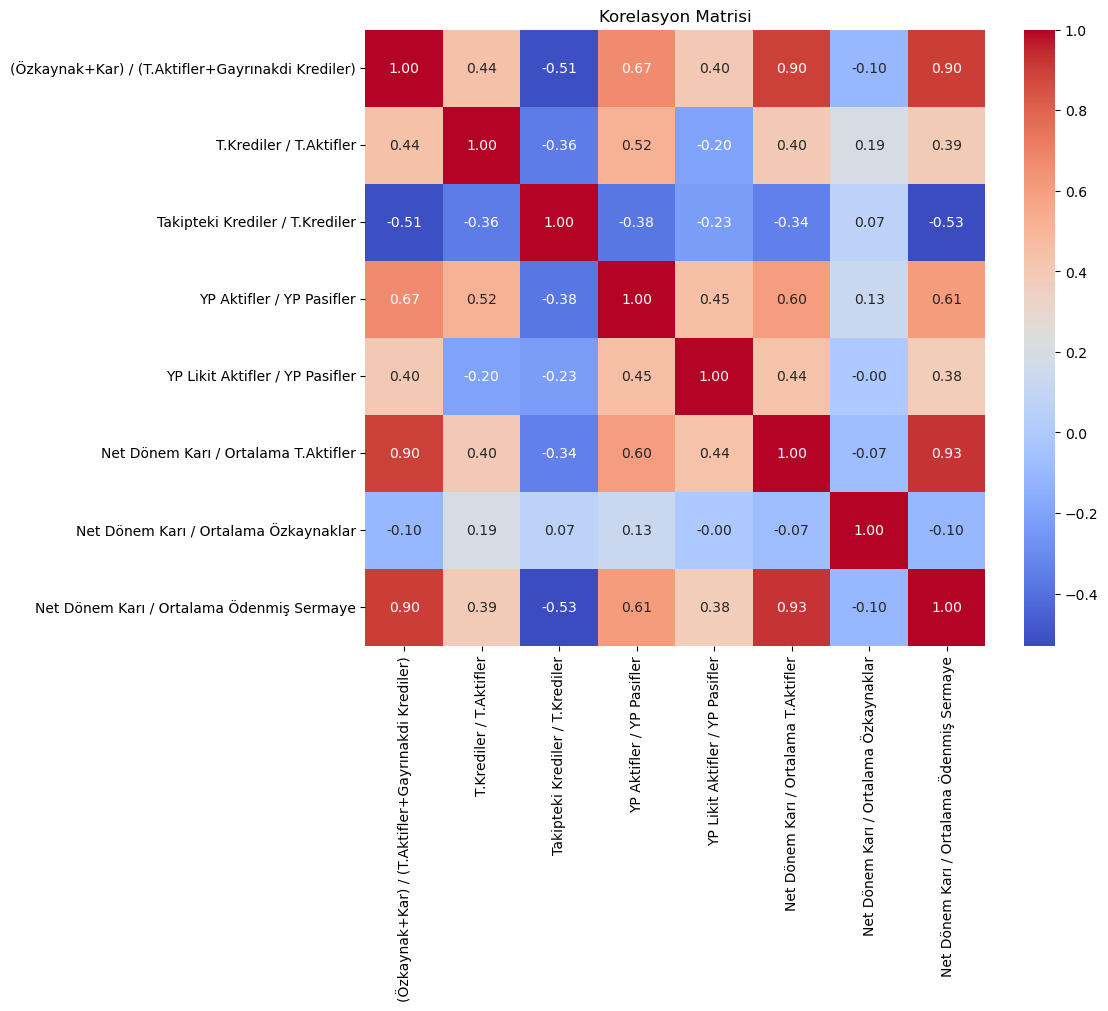

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi
correlation_matrix = banks_cleaned_numeric.corr()

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF hesaplama
X = banks_cleaned_numeric.drop(columns=['Net Dönem Karı / Ortalama T.Aktifler'])  # Bağımlı değişkeni çıkar
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                             Feature        VIF
0  (Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)   6.312724
1                            T.Krediler / T.Aktifler   7.429679
2                    Takipteki Krediler / T.Krediler   1.517477
3                          YP Aktifler / YP Pasifler  17.044190
4                    YP Likit Aktifler / YP Pasifler   5.991553
5              Net Dönem Karı / Ortalama Özkaynaklar   1.027053
6          Net Dönem Karı / Ortalama Ödenmiş Sermaye   6.729421


Takipteki Krediler / T.Krediler ve Net Dönem Karı / Ortalama Özkaynaklar sütunlarında çoklu doğrusal bağlantı sorunu yoktur çünkü -5<VIF<+5 arasındadır. YP Aktifler / YP Pasifler  17.044190 çok yüksek olmasının sebebi başka değişken ile çok yüksek korelasyon çıkmasındandır.Demek ki en çok ilişkideki sütunumuz YP Aktifler / YP Pasifler bağımsız değişkeniymiş. Genellikle bağımsız değişkenlerin birbirine çok yakın korelasyon göstermemesi gerekir. (Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler) ve Net Dönem Karı / Ortalama Ödenmiş Sermaye bunu biraz aştığından çoklu doğrusal bağlantı(multicollinearity) vardır.

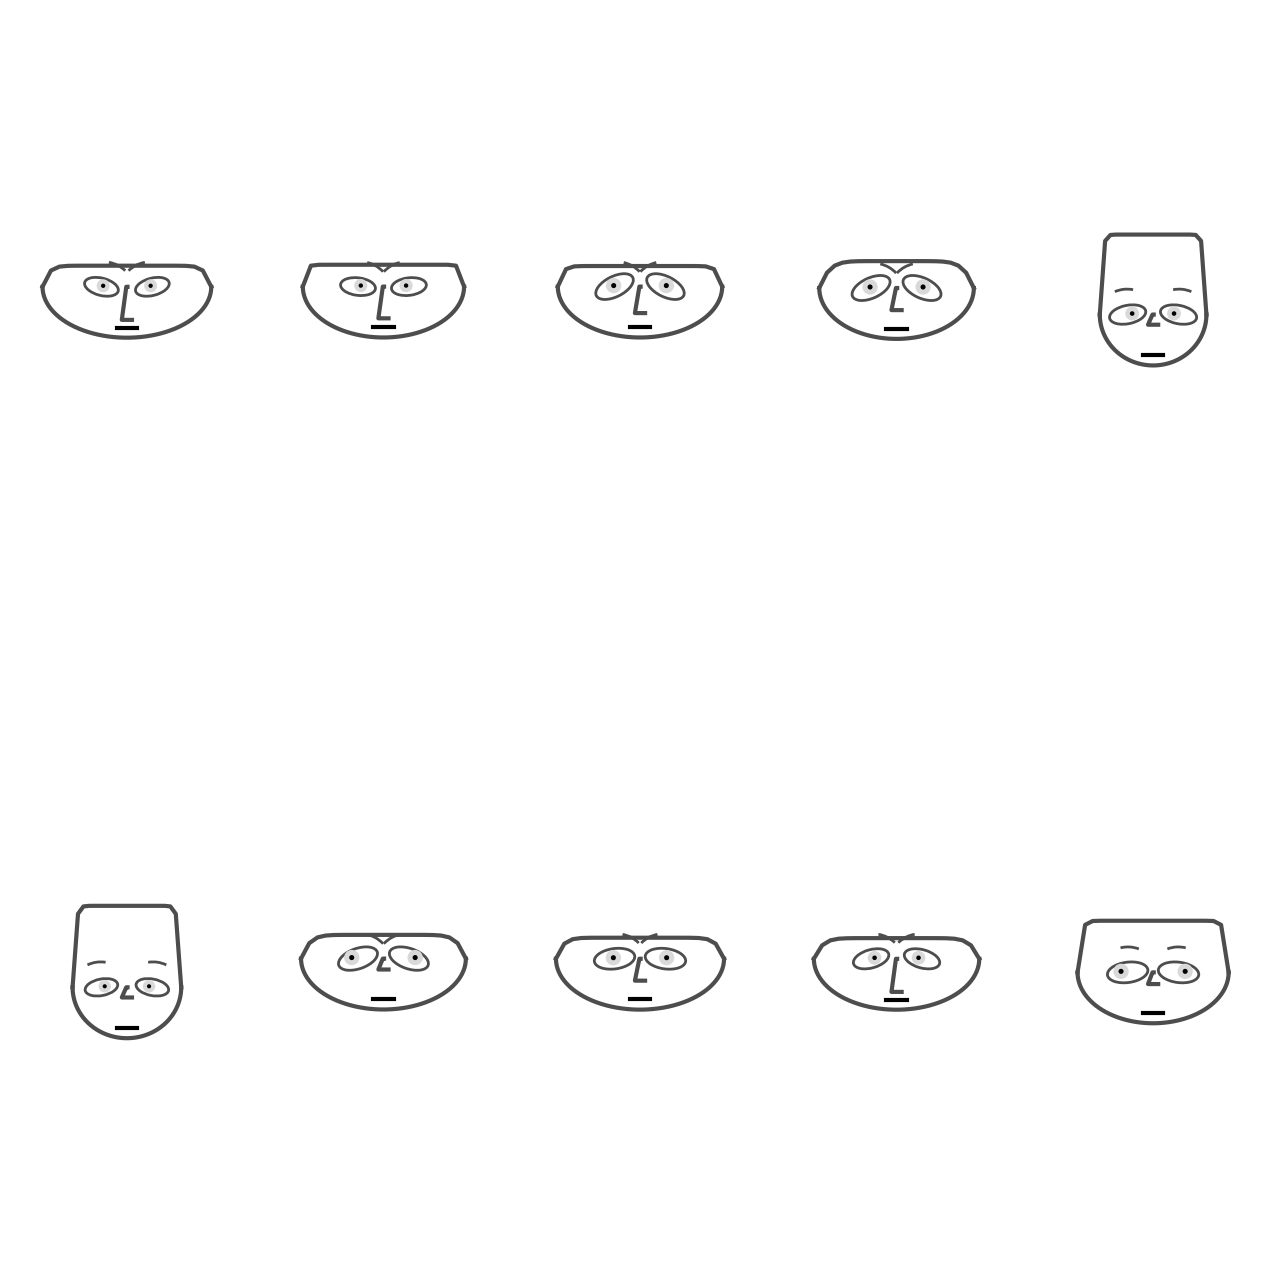

In [27]:
#2)Bu parametre, verinin genel özelliklerine (özellikle verinin dağılımına ve ölçümlerine) göre, yüzün algılanan "duygusal" ya da "fiziksel" yapısını etkileyebilir. Eğer verilerde belirgin bir değişkenlik veya simetri varsa, bu görsel değişiklikler veriyi daha iyi anlamanızı sağlayabilir.

from ChernoffFace import chernoff_face
import matplotlib.pyplot as plt

# Chernoff yüzleri için görselleştirme
fig = chernoff_face(data=banks_cleaned_numeric.iloc[:10],  # İlk 10 gözlemi seçiyoruz
                    n_columns=5,
                    long_face=False,
                    figsize=(8, 8),
                    dpi=200)
plt.show()

3. Eksik verili bir versiyonunu oluşturuyoruz.
   - Eksik verili bir veri setini ortalama ile doldurursak eğer bize sapmalı sonuç vermeyip analizimi etkilemez eğer farklı değerler atarsak küçük veri setleri için problem oluşabilir.
   - En doğru yol ortalama değerlerini sütunların eksik veri yerlerine atamaktır.

4)Aşırı değer analizi yapıcağız.

In [29]:
# Veriyi kopyalıyoruz
banks_with_missing = banks_cleaned_numeric.copy()

# Belirli bir yüzdede rastgele hücreleri NaN yapıyoruz (örneğin, %10)
missing_percentage = 0.1
missing_data = banks_with_missing.sample(frac=missing_percentage, random_state=42)

# Eksik değerlerin oluşturulması
for col in banks_with_missing.columns:
    banks_with_missing.loc[missing_data.index, col] = np.nan

# Sonuç
print(banks_with_missing.isnull().sum())


(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)    4
T.Krediler / T.Aktifler                              4
Takipteki Krediler / T.Krediler                      4
YP Aktifler / YP Pasifler                            4
YP Likit Aktifler / YP Pasifler                      4
Net Dönem Karı / Ortalama T.Aktifler                 4
Net Dönem Karı / Ortalama Özkaynaklar                4
Net Dönem Karı / Ortalama Ödenmiş Sermaye            4
dtype: int64


In [31]:
banks_with_missing.apply(lambda x: x.fillna(x.mean())) # Varsayılan axis=0'dır. Bu sütun bazında demek.

,(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler),T.Krediler / T.Aktifler,Takipteki Krediler / T.Krediler,YP Aktifler / YP Pasifler,YP Likit Aktifler / YP Pasifler,Net Dönem Karı / Ortalama T.Aktifler,Net Dönem Karı / Ortalama Özkaynaklar,Net Dönem Karı / Ortalama Ödenmiş Sermaye
1,8.063853,35.744739,1.593786,69.092799,24.846358,5.867689,58.317577,91.628267
2,2.500647,39.740475,3.253540,31.049619,16.464030,2.015983,28.876840,37.530201
3,1.737541,23.884281,0.935840,44.414074,41.920168,0.917544,19.791565,31.907878
4,6.422892,12.699995,15.002100,89.391947,81.237353,2.375364,39.008862,47.726316
5,-25.086214,36.538072,121.806065,59.445488,2.724291,-31.038266,60.669572,-263.130000
6,-60.491801,9.867205,1115.069119,5.869196,1.787967,-169.234991,223.111373,-2424.905983
7,8.711221,20.678587,6.141776,98.171635,80.503610,0.406922,3.012231,3.576000
8,4.229683,20.325116,0.243036,62.533701,39.474693,2.251823,25.828446,32.176471
9,-1.617070,30.093424,279.573946,66.849890,34.108681,-17.052559,-84.292401,-320.299050
10,2.870137,49.225741,5.455102,81.016144,22.880692,-5.632547,-74.700962,-64.393889


<Axes: >

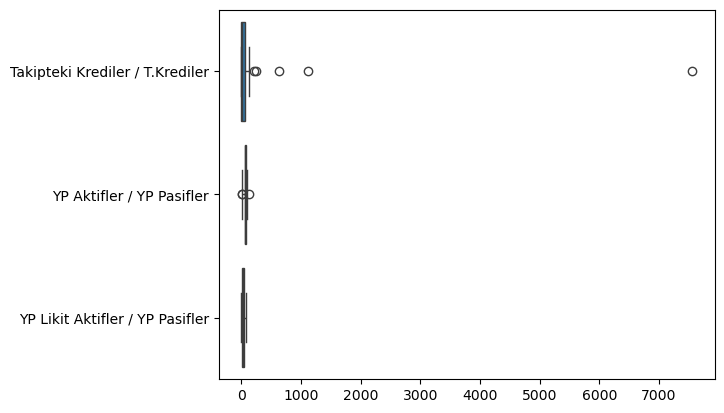

In [37]:
sbn.boxplot(data = banks_with_missing[['Takipteki Krediler / T.Krediler', 'YP Aktifler / YP Pasifler', 'YP Likit Aktifler / YP Pasifler']], orient = 'h')
# Bu grafikten de anlayacağımız üzere Takipteki Krediler / T.Krediler de aykırı değerler mevcut. Sadece 
# büyük değerlerde aykırı gözlemler mevcut.Burdan da aşırı derecede bazı bankalarda takipte kredi oranının etkileyen bazı kötü işlemler 
# olduğunu gösterir

In [48]:
q1_x = banks_with_missing['Takipteki Krediler / T.Krediler'].quantile(0.25)
q3_x = banks_with_missing['Takipteki Krediler / T.Krediler'].quantile(0.75)
iqr_x = q3_x - q1_x
# x değişkeni için aykırı değerleri belirleyecek sınırları bulabiliriz.
lowerbound_x = q1_x - 1.5 * iqr_x # Alt sınır
upperbound_x = q3_x + 1.5 * iqr_x # Üst sınır
print(lowerbound_x)
print(upperbound_x)

-95.06840942457006
162.69744441157746


<Axes: xlabel='(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)'>

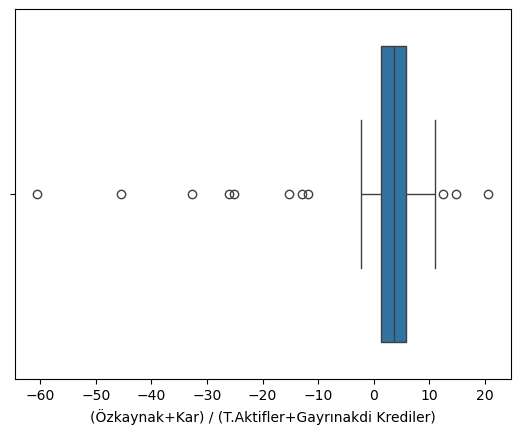

In [39]:
# Bağımlı değişkenimiz olan (Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler) değişkeni için de boxplot çizdirelim:
sbn.boxplot(x = banks_with_missing['(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)'])

In [171]:
### Bağımlı değişkenimizde daha fazla uç değer olması ne kadar etkilendiğini bize göstermiş oluyor.

In [41]:
banks = banks_cleaned.drop(columns=["Unnamed: 0"])  # Sayısal olmayan sütunları listeleyerek çıkarabilirsiniz
banks

,(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler),T.Krediler / T.Aktifler,Takipteki Krediler / T.Krediler,YP Aktifler / YP Pasifler,YP Likit Aktifler / YP Pasifler,Net Dönem Karı / Ortalama T.Aktifler,Net Dönem Karı / Ortalama Özkaynaklar,Net Dönem Karı / Ortalama Ödenmiş Sermaye
1,8.063853,35.744739,1.593786,69.092799,24.846358,5.867689,58.317577,91.628267
2,2.500647,39.740475,3.253540,31.049619,16.464030,2.015983,28.876840,37.530201
3,1.737541,23.884281,0.935840,44.414074,41.920168,0.917544,19.791565,31.907878
4,6.422892,12.699995,15.002100,89.391947,81.237353,2.375364,39.008862,47.726316
5,-25.086214,36.538072,121.806065,59.445488,2.724291,-31.038266,60.669572,-263.130000
6,-60.491801,9.867205,1115.069119,5.869196,1.787967,-169.234991,223.111373,-2424.905983
7,8.711221,20.678587,6.141776,98.171635,80.503610,0.406922,3.012231,3.576000
8,4.229683,20.325116,0.243036,62.533701,39.474693,2.251823,25.828446,32.176471
9,4.081897,20.637887,1.370950,73.594305,68.125616,5.782273,68.018069,88.774331
10,2.870137,49.225741,5.455102,81.016144,22.880692,-5.632547,-74.700962,-64.393889


In [55]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
import xgboost
from xgboost import XGBRegressor
# Hedef ve özellik değişkenlerini ayırma
y = banks["Net Dönem Karı / Ortalama Özkaynaklar"]
x_ = banks.drop(["Takipteki Krediler / T.Krediler", "YP Aktifler / YP Pasifler", "YP Likit Aktifler / YP Pasifler", "Net Dönem Karı / Ortalama Ödenmiş Sermaye"], axis=1).astype("float64")
x = pd.concat([x_, banks[["Takipteki Krediler / T.Krediler", "YP Aktifler / YP Pasifler", "YP Likit Aktifler / YP Pasifler"]]], axis=1)
# Sütun bazlı silme işlemi yapması için axis = 1 yazıldı.

# Veri setini bölme
banks_x_train, banks_x_test, banks_y_train, banks_y_test = train_test_split(
    x, y, test_size=0.2, random_state=2017
)


In [59]:
# Create the model and fit it
xgb_model = XGBRegressor()
xgb_model.fit(banks_x_train, banks_y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(banks_x_test)
xgb_y_pred

array([ 46.04296  ,   1.0472748,  16.60345  ,   1.0990962,   1.2809045,
        67.866325 ,  60.41046  , -74.493965 ,  24.798674 ], dtype=float32)

In [ ]:
### Normalize edildiğinde, tahmin değerleri daha düzenli ve beklenebilir hale gelir. Bu, modelin daha dengeli çalıştığını gösterebilir.

In [63]:
#5)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

#Normalizasyon için MinMaxScaler() fonksiyonu kullanıp varsayımları inceleriz.

# min-max scaler ile değişkenlerdeki gözlemleri 0 ve 1 aralığında ölçeklendiririz. 
# min_max_scaler işlemi uyglayacak bir araç hazırlayalım ki her defasında bu işlemi çağırmak kolay
# olsun:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Farklı olduğunu düşündüğümüz değişkenlere yani sayısal değişkenlere bu scaler işlemi yaptıralım:
banks.info()
numeric_vals = ["T.Krediler / T.Aktifler", "Takipteki Krediler / T.Krediler", "Takipteki Krediler / T.Krediler", "YP Likit Aktifler / YP Pasifler", "(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)"]

# Ölçeklendirme yaparken fit etme işlemi train set üzerinden yapılır.
banks_x_train[numeric_vals] = scaler.fit_transform(banks_x_train[numeric_vals])
banks_x_test[numeric_vals] = scaler.fit_transform(banks_x_test[numeric_vals])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 1 to 41
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   (Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)  41 non-null     float64
 1   T.Krediler / T.Aktifler                            41 non-null     float64
 2   Takipteki Krediler / T.Krediler                    41 non-null     float64
 3   YP Aktifler / YP Pasifler                          41 non-null     float64
 4   YP Likit Aktifler / YP Pasifler                    41 non-null     float64
 5   Net Dönem Karı / Ortalama T.Aktifler               41 non-null     float64
 6   Net Dönem Karı / Ortalama Özkaynaklar              41 non-null     float64
 7   Net Dönem Karı / Ortalama Ödenmiş Sermaye          41 non-null     float64
dtypes: float64(8)
memory usage: 2.7 KB


In [65]:
#Min-Max dönüşümü 
# Verinin en küçük değerleri 0 en büyük değerleri 1'e eşit yapan dönüşüm.
scaler00 = preprocessing.MinMaxScaler(feature_range=(0,1))
# Yukarıdaki kod satırı bir ölçeklendirici hazırlar. Bu ölçeklendiriciyi bir nesnede tutup o nesne
# üzerinden tanmladığımız bu ölçeklendirmeyi istediğimiz yerde daha rahat kullanabiliriz.

scaler00.fit_transform(banks) 
# x_yeni = (x_gözlem - min(x)) / (max(x) - min(x))  şeklinde hesaplıyor.

# Değerleri 0 ve 1 arasındaki değerlerden oluşan bu yeni veriyi data frame yapısına dönüştürelim:
banksscaler00 = pd.DataFrame(scaler00.fit_transform(banks))

In [71]:
#RFE, özellik seçimi için kullanılan bir tekniktir. Özellik seçimi modelin performansını
# iyileştirmek, aşırı uyumu (overfitting) önlemek ve eğitim süresini kısaltmak amacıyla gereksiz
# veya anlamlı olmayan özellikleri (değişkenleri) veriden çıkarmak için yapılan bir işlemdir.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Bir lineer regresyon modeli oluşturalım:
lm_RFE = LinearRegression()
# Modeli x'lere karşılık y'lerle fit edelim:
lm_RFE.fit(banks_x_train, banks_y_train)

# Şimdi bu fit edilmiş model üzerinden RFE işlemi yapalım yani 7 bağımsız değişken seçelim:
rfe = RFE(lm_RFE, n_features_to_select=7)

rfe = rfe.fit(banks_x_train, banks_y_train)
list(zip(banks_x_train.columns, rfe.support_, rfe.ranking_)) # Hangi değişkenlerin modelde olduğuna  dair bir liste verir.


[('(Özkaynak+Kar) / (T.Aktifler+Gayrınakdi Krediler)', True, 1),
 ('T.Krediler / T.Aktifler', True, 1),
 ('Net Dönem Karı / Ortalama T.Aktifler', True, 1),
 ('Net Dönem Karı / Ortalama Özkaynaklar', True, 1),
 ('Takipteki Krediler / T.Krediler', True, 1),
 ('YP Aktifler / YP Pasifler', True, 1),
 ('YP Likit Aktifler / YP Pasifler', True, 1)]

In [87]:
# Toplamda 7 değişken var. 7 tanesinde 1 var. Çünkü tahminleri 7 değişken ile yaptı.
# Bu modelde işe yaramadığını düşündüğü modele dahil etmediği değişken yok hepsi true döndü.

# Tahminlerimizi bu 7 değişken ile elde edebiliriz.

y_pred_Train = rfe.predict(banks_x_train)
y_pred_Train


y_pred_Test = rfe.predict(banks_x_test)
y_pred_Test

array([ 47.84759715,   5.69944228,  16.92242448,   3.78633963,
         1.95867026,  72.56588129,  61.90123349, -19.88063095,
        31.47863121])

In [107]:
print("banks_y_train shape:", banks_y_train.shape)
print("y_pred_Train shape:", y_pred_Train.shape)
print("banks_y_test shape:", banks_y_test.shape)
print("y_pred_Test shape:", y_pred_Test.shape)


banks_y_train shape: (32,)
y_pred_Train shape: (32,)
banks_y_test shape: (9,)
y_pred_Test shape: (9,)


In [127]:
banks_y_train = banks_y_train.fillna(banks_y_train.mean())
banks_y_test = banks_y_test.fillna(banks_y_test.mean())


In [ ]:
# RMSE ve MAPE hesaplama fonksiyonu
def rmse(banks_y_train, y_pred_Train):
    return np.sqrt(np.mean((banks_y_train - y_pred_Train) ** 2))

def mape(y_true, y_pred_Train):
    return np.mean(np.abs((banks_y_train - y_pred_Train) / banks_y_train)) * 100


# Eğitim kümesi için RMSE ve MAPE
rmse_train = rmse(banks_y_train, y_pred_Train)
mape_train = mape(banks_y_train, y_pred_Train)

# Test kümesi için RMSE ve MAPE
rmse_test = rmse(banks_y_test, y_pred_Test)
mape_test = mape(banks_y_test, y_pred_Test)